<h1>Decision Treee</h1>

<h3>This data is about traders that are classified as High Frequency Traders, Non HFT and mix. A Decision Tree is used as a classification model.</h3>
<h3>Challenge can be found <a href="https://challengedata.ens.fr/participants/challenges/50/">here</a></h3>

In [1]:
import pandas as pd

In [2]:
df_raw_test_x = pd.read_csv('./ML_TREE/AMF_test_X_uDs0jHH.csv',index_col=0)

In [3]:
df_raw_test_x.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_106,Date_12,Adelaide,1.114754,68.0,NaN,0.000012,22.905096,0.000061,0.003870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,Isin_94,Date_2,Adelaide,1.666667,5.0,NaN,0.001970,67.630572,0.001970,0.005786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Isin_106,Date_13,Adelaide,1.088235,37.0,NaN,0.000000,39.506490,0.000000,0.000485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,Isin_106,Date_7,Adelaide,2.250000,4.5,NaN,0.000000,103.378733,0.000000,0.004708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,Isin_106,Date_20,Adelaide,1.266667,19.0,NaN,0.000026,49.417177,0.000063,0.000152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [4]:
df_raw_train_x = pd.read_csv('./ML_TREE/AMF_train_X_XCZw8r3.csv',index_col=0)

In [5]:
df_raw_train_x.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [6]:
df_raw_train_y = pd.read_csv('./ML_TREE/AMF_train_Y_omYQJZL.csv')

In [7]:
df_raw_train_y.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [8]:
df_train_x_labeled = pd.merge(df_raw_train_x,df_raw_train_y, on="Trader")

In [9]:
df_train_x_labeled.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [10]:
#remove mix to get binary value (HFT & NON HFT)
df_train_x_labeled = df_train_x_labeled[df_train_x_labeled["type"] != "MIX"]

In [11]:
def fn_is_HFT(row):
    if row["type"] == "HFT":
        return 1
    else:
        return 0
    
df_train_x_labeled["is_hft"] = df_train_x_labeled.apply(lambda row:fn_is_HFT(row), axis=1)
df_train_x_labeled = df_train_x_labeled.drop(columns=['type'])

In [12]:
df_train_x_labeled.head(5)

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,is_hft
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,0
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,0


In [13]:
df_train_x_labeled.describe()

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,is_hft
count,52699.000000,54299.000000,17759.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,...,35750.000000,35750.000000,35695.000000,35695.000000,35695.000000,35809.000000,35809.000000,35809.000000,54299.000000,54299.000000
mean,51.444705,21.042564,78.194798,166.118823,4276.099994,195.374375,1875.560802,432.566096,6835.458554,13100.845984,...,642.548843,399.892474,321.454553,656.129027,418.776488,320.504203,680.676579,423.887606,304.896057,0.588409
std,185.873322,74.134559,329.481674,2150.696994,6172.533886,2240.184197,6764.427934,3213.335836,11711.518320,14812.727453,...,1935.710543,1791.122734,1826.830438,1963.281111,1843.269884,1799.581002,1977.900063,1821.006661,728.111636,0.492126
min,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000,0.000000
25%,4.028571,2.204804,2.449518,0.000000,62.044647,0.000000,0.551091,0.000006,18.285153,131.017970,...,24.593915,0.104581,0.000002,23.728049,0.105180,0.000008,26.329441,0.286100,13.000000,0.000000
50%,9.285714,5.125000,9.857143,0.000000,1191.793415,0.000078,9.195331,0.023615,326.850040,5017.511000,...,113.022647,8.599901,0.000038,115.620129,10.048302,0.000117,123.825931,12.401300,50.000000,1.000000
75%,45.328901,19.500000,33.301948,0.000000,6491.310963,0.001852,214.850545,1.422636,6708.484800,24837.088000,...,471.985474,146.978598,1.085469,493.263897,160.991818,1.950172,516.063840,173.749744,220.000000,1.000000
max,17561.000000,2626.500000,11625.500000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,52740.610000,53904.290000,...,30892.912000,30892.912000,30892.912000,30892.912000,30892.912000,30810.354000,30810.354000,30810.354000,12966.000000,1.000000


<h2>Feature Analysis</h2>
<p>Feature Analysis to find threshold and limits to binarize</p>

<h3>OTR</h3>

<AxesSubplot:>

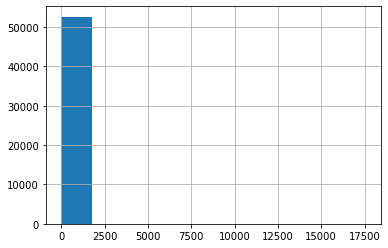

In [14]:
df_train_x_labeled["OTR"].hist()

<AxesSubplot:>

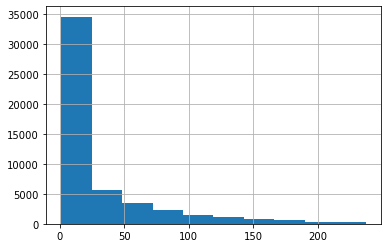

In [15]:
common = df_train_x_labeled.describe()["OTR"]["mean"] + df_train_x_labeled.describe()["OTR"]["std"]
df_train_x_labeled[df_train_x_labeled["OTR"] <= common]["OTR"].hist()

<AxesSubplot:>

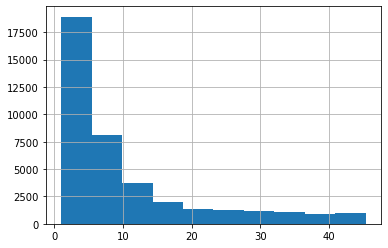

In [16]:
q75 =df_train_x_labeled.describe()["OTR"]["75%"]
df_train_x_labeled[df_train_x_labeled["OTR"] <= q75]["OTR"].hist()

In [17]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["OTR"] == 0.0]) + df_train_x_labeled["OTR"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["OTR"])) * 100

2.9466472679054863

<h3>OCR</h3>

<AxesSubplot:>

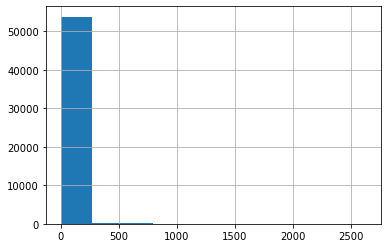

In [18]:
df_train_x_labeled["OCR"].hist()

<AxesSubplot:>

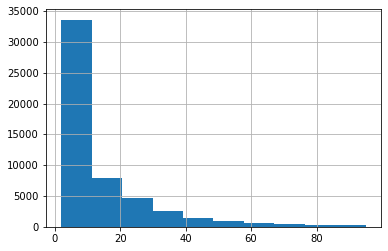

In [19]:
common = df_train_x_labeled.describe()["OCR"]["mean"] + df_train_x_labeled.describe()["OCR"]["std"]
df_train_x_labeled[df_train_x_labeled["OCR"] <= common]["OCR"].hist()

<AxesSubplot:>

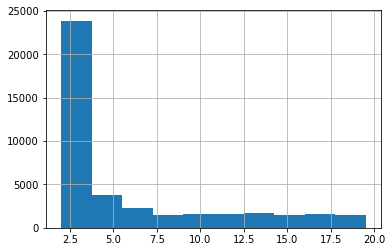

In [20]:
q75 =df_train_x_labeled.describe()["OCR"]["75%"]
df_train_x_labeled[df_train_x_labeled["OCR"] <= q75]["OCR"].hist()

In [21]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["OCR"] == 0.0]) + df_train_x_labeled["OTR"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["OCR"])) * 100

2.9466472679054863

<h3>OMR</h3>

<AxesSubplot:>

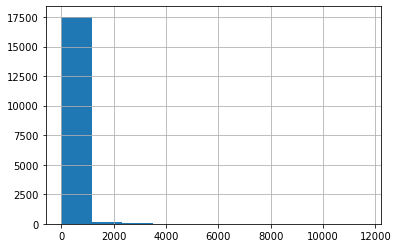

In [22]:
df_train_x_labeled["OMR"].hist()

<AxesSubplot:>

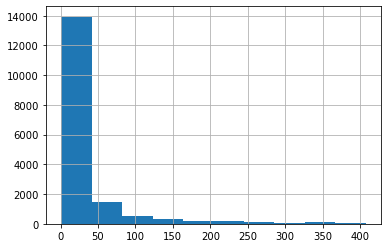

In [23]:
common = df_train_x_labeled.describe()["OMR"]["mean"] + df_train_x_labeled.describe()["OMR"]["std"]
df_train_x_labeled[df_train_x_labeled["OMR"] <= common]["OMR"].hist()

<AxesSubplot:>

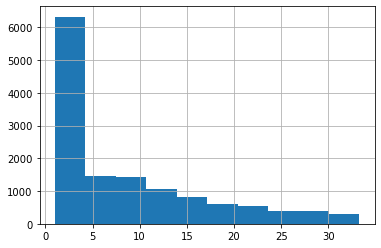

In [24]:
q75 =df_train_x_labeled.describe()["OMR"]["75%"]
df_train_x_labeled[df_train_x_labeled["OMR"] <= q75]["OMR"].hist()

In [25]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["OMR"] == 0.0]) + df_train_x_labeled["OMR"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["OMR"])) * 100

67.29405698079154

In [26]:
# dos culumnas A = si tiene 0 B= si tiene menos de 4

<h3>min_time_two_events</h3>

<AxesSubplot:>

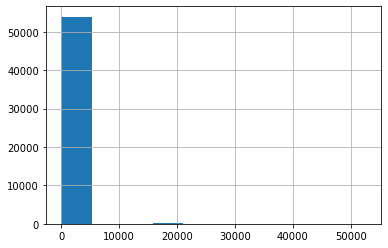

In [27]:
df_train_x_labeled["min_time_two_events"].hist()

<AxesSubplot:>

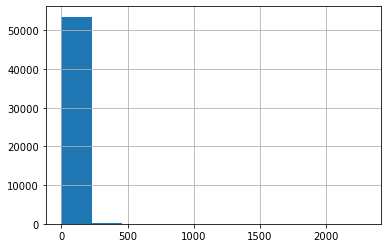

In [28]:
common = df_train_x_labeled.describe()["min_time_two_events"]["mean"] + df_train_x_labeled.describe()["min_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["min_time_two_events"] <= common]["min_time_two_events"].hist()

<AxesSubplot:>

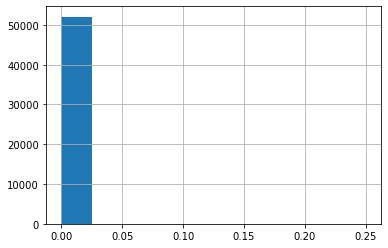

In [29]:
df_train_x_labeled[df_train_x_labeled["min_time_two_events"] <= 0.25]["min_time_two_events"].hist()

In [30]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["min_time_two_events"] == 0.0]) + df_train_x_labeled["min_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["min_time_two_events"])) * 100

86.19495754986279

<h3>mean_time_two_events</h3>

<AxesSubplot:>

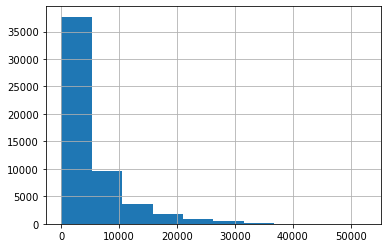

In [31]:
df_train_x_labeled["mean_time_two_events"].hist()

<AxesSubplot:>

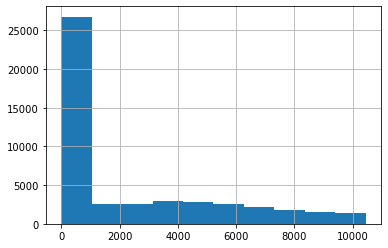

In [32]:
common = df_train_x_labeled.describe()["mean_time_two_events"]["mean"] + df_train_x_labeled.describe()["mean_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["mean_time_two_events"] <= common]["mean_time_two_events"].hist()

<AxesSubplot:>

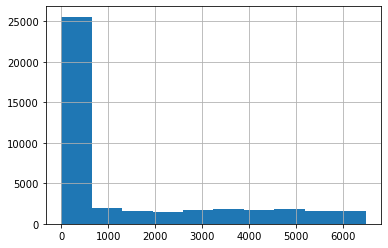

In [33]:
q75 =df_train_x_labeled.describe()["mean_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["mean_time_two_events"] <= q75]["mean_time_two_events"].hist()

In [34]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["mean_time_two_events"] == 0.0]) + df_train_x_labeled["mean_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["mean_time_two_events"])) * 100

0.0

<h3>10_p_time_two_events</h3>

<AxesSubplot:>

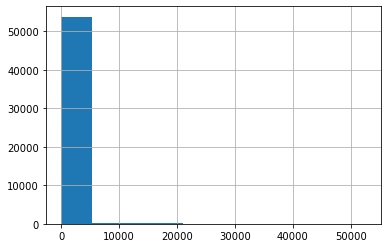

In [35]:
df_train_x_labeled["10_p_time_two_events"].hist()

<AxesSubplot:>

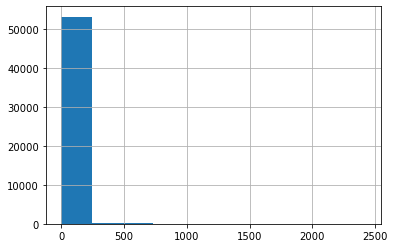

In [36]:
common = df_train_x_labeled.describe()["10_p_time_two_events"]["mean"] + df_train_x_labeled.describe()["10_p_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["10_p_time_two_events"] <= common]["10_p_time_two_events"].hist()

<AxesSubplot:>

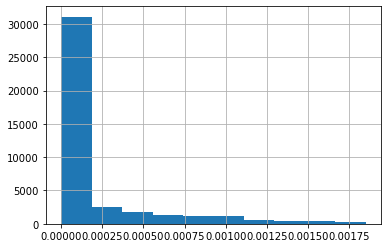

In [37]:
q75 =df_train_x_labeled.describe()["10_p_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["10_p_time_two_events"] <= q75]["10_p_time_two_events"].hist()

In [38]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["10_p_time_two_events"] == 0.0]) + df_train_x_labeled["10_p_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["10_p_time_two_events"])) * 100

39.44087368091493

<h3>med_time_two_events</h3>

<AxesSubplot:>

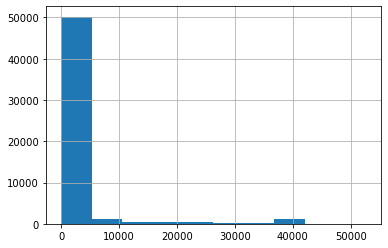

In [39]:
df_train_x_labeled["med_time_two_events"].hist()

<AxesSubplot:>

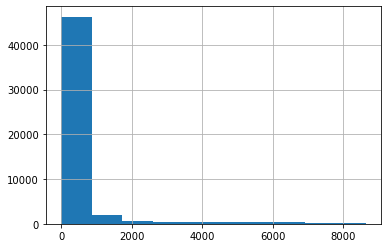

In [40]:
common = df_train_x_labeled.describe()["med_time_two_events"]["mean"] + df_train_x_labeled.describe()["med_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["med_time_two_events"] <= common]["med_time_two_events"].hist()

<AxesSubplot:>

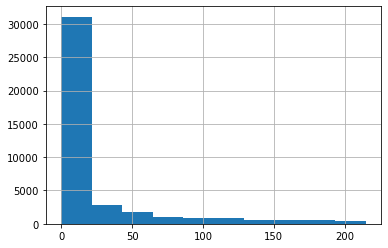

In [41]:
q75 =df_train_x_labeled.describe()["med_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["med_time_two_events"] <= q75]["med_time_two_events"].hist()

In [42]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["med_time_two_events"] == 0.0]) + df_train_x_labeled["med_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["med_time_two_events"])) * 100

6.948562588629626

<h3>25_p_time_two_events</h3>

<AxesSubplot:>

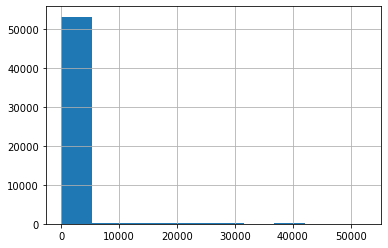

In [43]:
df_train_x_labeled["25_p_time_two_events"].hist()

<AxesSubplot:>

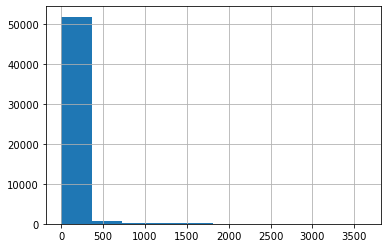

In [44]:
common = df_train_x_labeled.describe()["25_p_time_two_events"]["mean"] + df_train_x_labeled.describe()["25_p_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["25_p_time_two_events"] <= common]["25_p_time_two_events"].hist()

<AxesSubplot:>

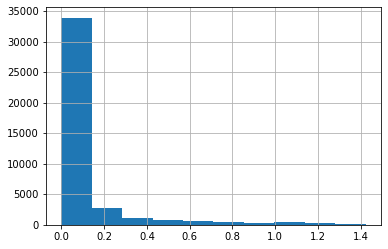

In [45]:
q75 =df_train_x_labeled.describe()["25_p_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["25_p_time_two_events"] <= q75]["25_p_time_two_events"].hist()

In [46]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["25_p_time_two_events"] == 0.0]) + df_train_x_labeled["25_p_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["25_p_time_two_events"])) * 100

23.1551225621098

<h3>75_p_time_two_events</h3>

<AxesSubplot:>

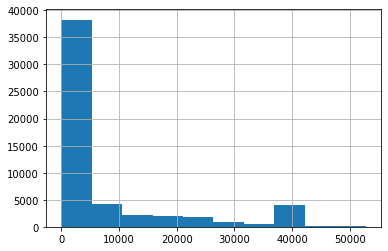

In [47]:
df_train_x_labeled["75_p_time_two_events"].hist()

<AxesSubplot:>

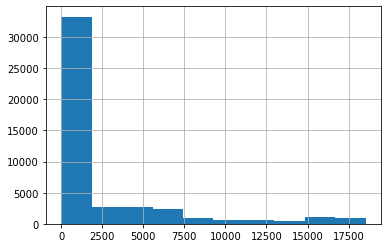

In [48]:
common = df_train_x_labeled.describe()["75_p_time_two_events"]["mean"] + df_train_x_labeled.describe()["75_p_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["75_p_time_two_events"] <= common]["75_p_time_two_events"].hist()

<AxesSubplot:>

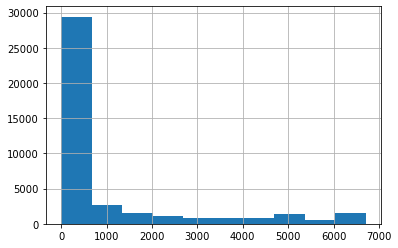

In [49]:
q75 =df_train_x_labeled.describe()["75_p_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["75_p_time_two_events"] <= q75]["75_p_time_two_events"].hist()

In [50]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["75_p_time_two_events"] == 0.0]) + df_train_x_labeled["75_p_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["75_p_time_two_events"])) * 100

0.9355605075599918

<h3>90_p_time_two_events</h3>

<AxesSubplot:>

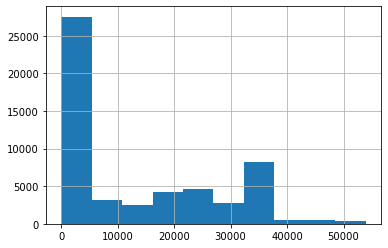

In [51]:
df_train_x_labeled["90_p_time_two_events"].hist()

<AxesSubplot:>

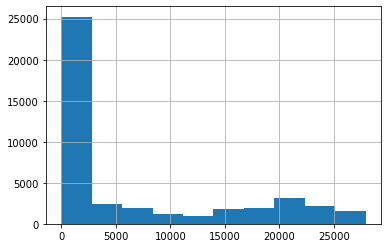

In [52]:
common = df_train_x_labeled.describe()["90_p_time_two_events"]["mean"] + df_train_x_labeled.describe()["90_p_time_two_events"]["std"]
df_train_x_labeled[df_train_x_labeled["90_p_time_two_events"] <= common]["90_p_time_two_events"].hist()

<AxesSubplot:>

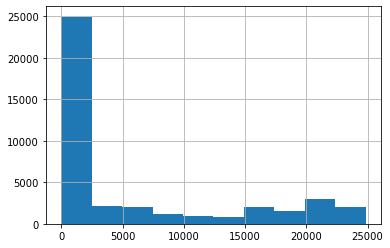

In [53]:
q75 =df_train_x_labeled.describe()["90_p_time_two_events"]["75%"]
df_train_x_labeled[df_train_x_labeled["90_p_time_two_events"] <= q75]["90_p_time_two_events"].hist()

In [54]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["90_p_time_two_events"] == 0.0]) + df_train_x_labeled["90_p_time_two_events"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["90_p_time_two_events"])) * 100

0.10497430891913295

<h3>mean_dt_TV1_TV2</h3>

<AxesSubplot:>

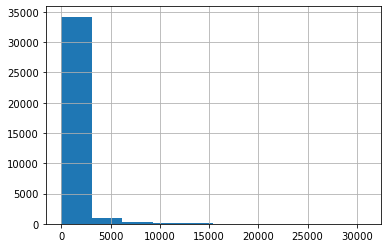

In [55]:
df_train_x_labeled["mean_dt_TV1_TV2"].hist()

<AxesSubplot:>

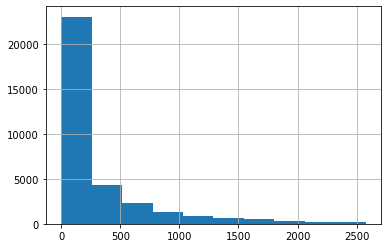

In [56]:
common = df_train_x_labeled.describe()["mean_dt_TV1_TV2"]["mean"] + df_train_x_labeled.describe()["mean_dt_TV1_TV2"]["std"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV2"] <= common]["mean_dt_TV1_TV2"].hist()

<AxesSubplot:>

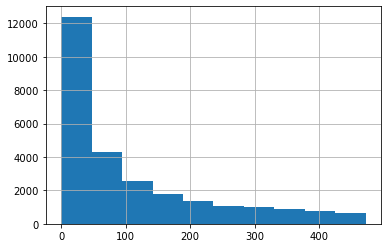

In [57]:
q75 =df_train_x_labeled.describe()["mean_dt_TV1_TV2"]["75%"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV2"] <= q75]["mean_dt_TV1_TV2"].hist()

In [58]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV2"] == 0.0]) + df_train_x_labeled["mean_dt_TV1_TV2"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["mean_dt_TV1_TV2"])) * 100

34.16085010773679

<h3>med_dt_TV1_TV2</h3>

<AxesSubplot:>

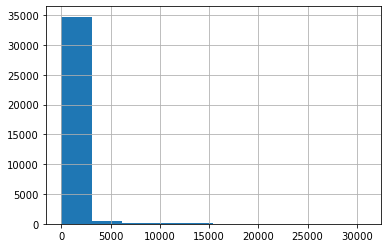

In [59]:
df_train_x_labeled["med_dt_TV1_TV2"].hist()

<AxesSubplot:>

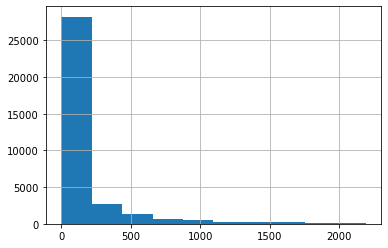

In [60]:
common = df_train_x_labeled.describe()["med_dt_TV1_TV2"]["mean"] + df_train_x_labeled.describe()["med_dt_TV1_TV2"]["std"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV2"] <= common]["med_dt_TV1_TV2"].hist()

<AxesSubplot:>

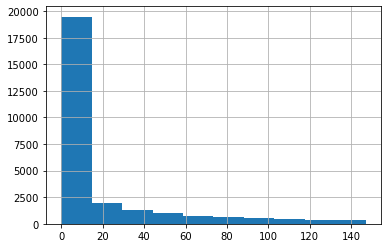

In [61]:
q75 =df_train_x_labeled.describe()["med_dt_TV1_TV2"]["75%"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV2"] <= q75]["med_dt_TV1_TV2"].hist()

In [62]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV2"] == 0.0]) + df_train_x_labeled["med_dt_TV1_TV2"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["med_dt_TV1_TV2"])) * 100

34.16085010773679

<h3>min_dt_TV1_TV3</h3>

<AxesSubplot:>

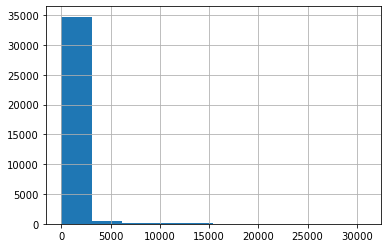

In [63]:
df_train_x_labeled["min_dt_TV1_TV3"].hist()

<AxesSubplot:>

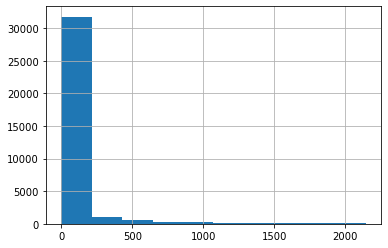

In [64]:
common = df_train_x_labeled.describe()["min_dt_TV1_TV3"]["mean"] + df_train_x_labeled.describe()["min_dt_TV1_TV3"]["std"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV3"] <= common]["min_dt_TV1_TV3"].hist()

<AxesSubplot:>

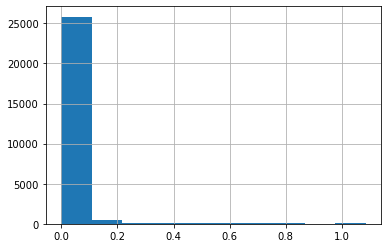

In [65]:
q75 =df_train_x_labeled.describe()["min_dt_TV1_TV3"]["75%"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV3"] <= q75]["min_dt_TV1_TV3"].hist()

In [66]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV3"] == 0.0]) + df_train_x_labeled["min_dt_TV1_TV3"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["min_dt_TV1_TV3"])) * 100

34.26214110757104

<h3>mean_dt_TV1_TV3</h3>

<AxesSubplot:>

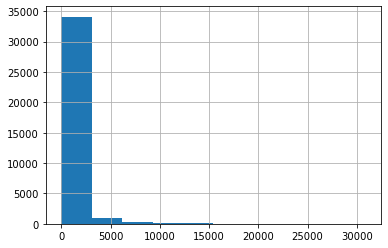

In [67]:
df_train_x_labeled["mean_dt_TV1_TV3"].hist()

<AxesSubplot:>

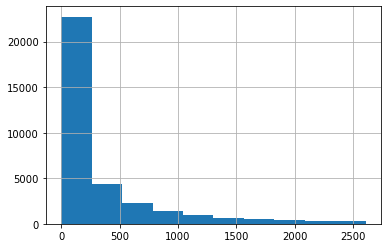

In [68]:
common = df_train_x_labeled.describe()["mean_dt_TV1_TV3"]["mean"] + df_train_x_labeled.describe()["mean_dt_TV1_TV3"]["std"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV3"] <= common]["mean_dt_TV1_TV3"].hist()

<AxesSubplot:>

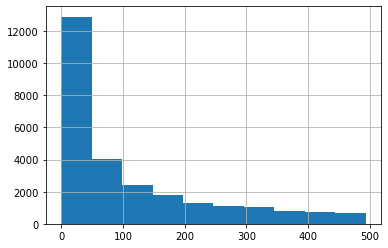

In [69]:
q75 =df_train_x_labeled.describe()["mean_dt_TV1_TV3"]["75%"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV3"] <= q75]["mean_dt_TV1_TV3"].hist()

In [70]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV3"] == 0.0]) + df_train_x_labeled["mean_dt_TV1_TV3"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["mean_dt_TV1_TV3"])) * 100

34.26214110757104

<h3>med_dt_TV1_TV3</h3>

<AxesSubplot:>

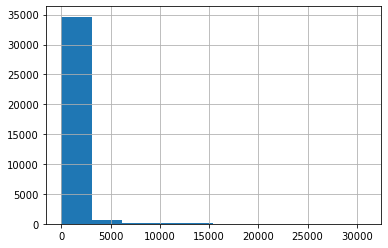

In [71]:
df_train_x_labeled["med_dt_TV1_TV3"].hist()

<AxesSubplot:>

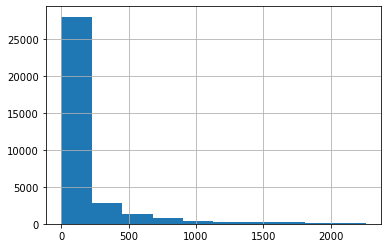

In [72]:
common = df_train_x_labeled.describe()["med_dt_TV1_TV3"]["mean"] + df_train_x_labeled.describe()["med_dt_TV1_TV3"]["std"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV3"] <= common]["med_dt_TV1_TV3"].hist()

<AxesSubplot:>

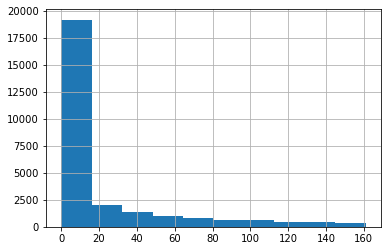

In [73]:
q75 =df_train_x_labeled.describe()["med_dt_TV1_TV3"]["75%"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV3"] <= q75]["med_dt_TV1_TV3"].hist()

In [74]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV3"] == 0.0]) + df_train_x_labeled["med_dt_TV1_TV3"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["med_dt_TV1_TV3"])) * 100

34.26214110757104

<h3>min_dt_TV1_TV4</h3>

<AxesSubplot:>

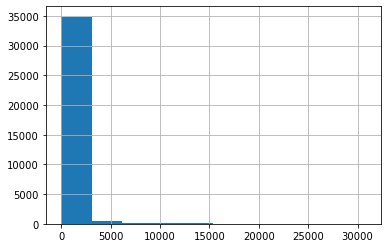

In [75]:
df_train_x_labeled["min_dt_TV1_TV4"].hist()

<AxesSubplot:>

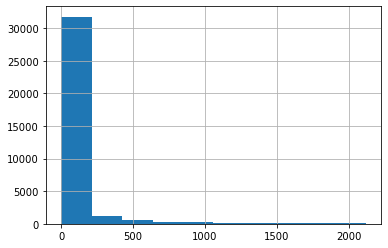

In [76]:
common = df_train_x_labeled.describe()["min_dt_TV1_TV4"]["mean"] + df_train_x_labeled.describe()["min_dt_TV1_TV4"]["std"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV4"] <= common]["min_dt_TV1_TV4"].hist()

<AxesSubplot:>

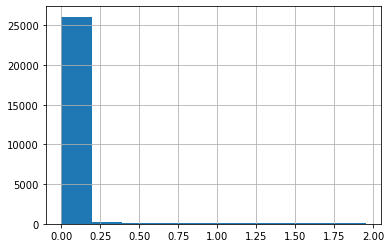

In [77]:
q75 =df_train_x_labeled.describe()["min_dt_TV1_TV4"]["75%"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV4"] <= q75]["min_dt_TV1_TV4"].hist()

In [78]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV4"] == 0.0]) + df_train_x_labeled["min_dt_TV1_TV4"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["min_dt_TV1_TV4"])) * 100

34.052192489732775

<h3>mean_dt_TV1_TV4</h3>

<AxesSubplot:>

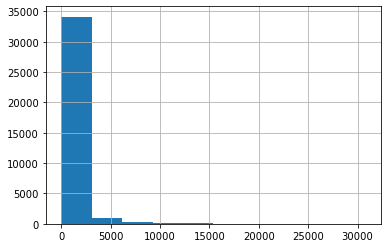

In [79]:
df_train_x_labeled["mean_dt_TV1_TV4"].hist()

<AxesSubplot:>

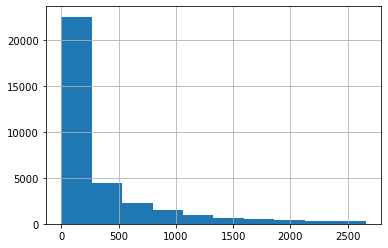

In [80]:
common = df_train_x_labeled.describe()["mean_dt_TV1_TV4"]["mean"] + df_train_x_labeled.describe()["mean_dt_TV1_TV4"]["std"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV4"] <= common]["mean_dt_TV1_TV4"].hist()

<AxesSubplot:>

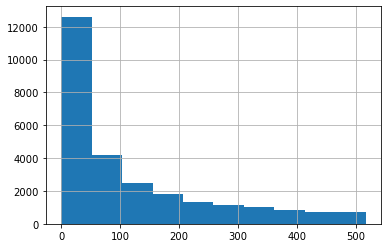

In [81]:
q75 =df_train_x_labeled.describe()["mean_dt_TV1_TV4"]["75%"]
df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV4"] <= q75]["mean_dt_TV1_TV4"].hist()

In [82]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["mean_dt_TV1_TV4"] == 0.0]) + df_train_x_labeled["mean_dt_TV1_TV4"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["mean_dt_TV1_TV4"])) * 100

34.052192489732775

<h3>med_dt_TV1_TV4</h3>

<AxesSubplot:>

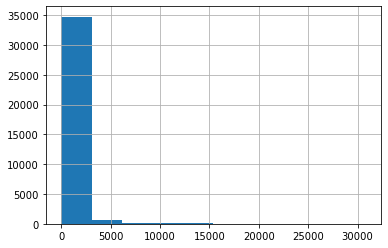

In [83]:
df_train_x_labeled["med_dt_TV1_TV4"].hist()

<AxesSubplot:>

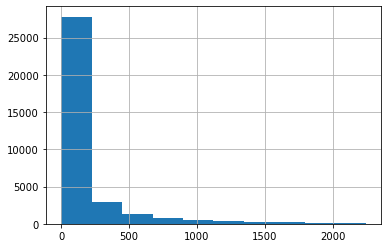

In [84]:
common = df_train_x_labeled.describe()["med_dt_TV1_TV4"]["mean"] + df_train_x_labeled.describe()["med_dt_TV1_TV4"]["std"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV4"] <= common]["med_dt_TV1_TV4"].hist()

<AxesSubplot:>

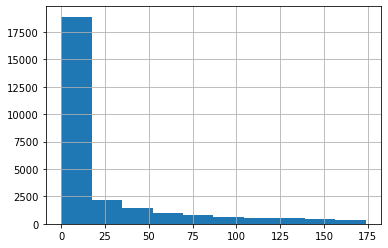

In [85]:
q75 =df_train_x_labeled.describe()["med_dt_TV1_TV4"]["75%"]
df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV4"] <= q75]["med_dt_TV1_TV4"].hist()

In [86]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["med_dt_TV1_TV4"] == 0.0]) + df_train_x_labeled["med_dt_TV1_TV4"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["med_dt_TV1_TV4"])) * 100

34.052192489732775

<h3>NbSecondWithAtLeatOneTrade</h3>

<AxesSubplot:>

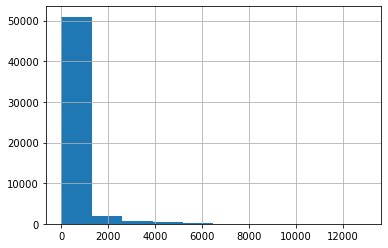

In [87]:
df_train_x_labeled["NbSecondWithAtLeatOneTrade"].hist()

<AxesSubplot:>

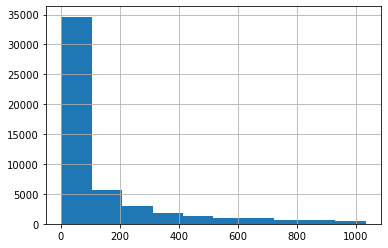

In [88]:
common = df_train_x_labeled.describe()["NbSecondWithAtLeatOneTrade"]["mean"] + df_train_x_labeled.describe()["NbSecondWithAtLeatOneTrade"]["std"]
df_train_x_labeled[df_train_x_labeled["NbSecondWithAtLeatOneTrade"] <= common]["NbSecondWithAtLeatOneTrade"].hist()

<AxesSubplot:>

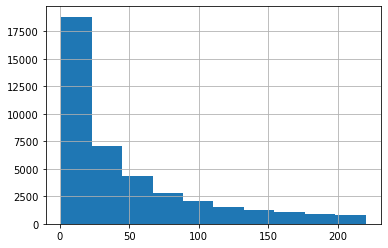

In [89]:
q75 =df_train_x_labeled.describe()["NbSecondWithAtLeatOneTrade"]["75%"]
df_train_x_labeled[df_train_x_labeled["NbSecondWithAtLeatOneTrade"] <= q75]["NbSecondWithAtLeatOneTrade"].hist()

In [90]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["NbSecondWithAtLeatOneTrade"] == 0.0]) + df_train_x_labeled["NbSecondWithAtLeatOneTrade"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["NbSecondWithAtLeatOneTrade"])) * 100

0.0

<h3>NbTradeVenueMic</h3>

<AxesSubplot:>

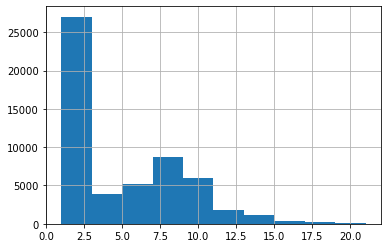

In [91]:
df_train_x_labeled["NbTradeVenueMic"].hist()

<AxesSubplot:>

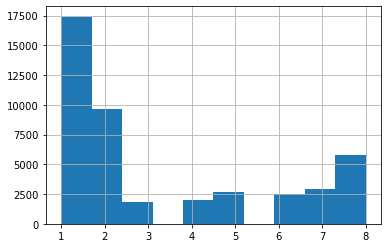

In [92]:
common = df_train_x_labeled.describe()["NbTradeVenueMic"]["mean"] + df_train_x_labeled.describe()["NbTradeVenueMic"]["std"]
df_train_x_labeled[df_train_x_labeled["NbTradeVenueMic"] <= common]["NbTradeVenueMic"].hist()

<AxesSubplot:>

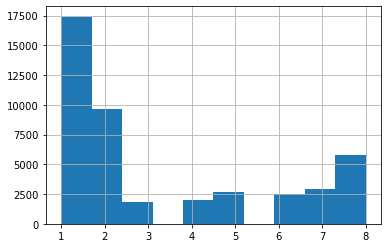

In [93]:
q75 =df_train_x_labeled.describe()["NbTradeVenueMic"]["75%"]
df_train_x_labeled[df_train_x_labeled["NbTradeVenueMic"] <= q75]["NbTradeVenueMic"].hist()

In [94]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["NbTradeVenueMic"] == 0.0]) + df_train_x_labeled["NbTradeVenueMic"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["NbTradeVenueMic"])) * 100

0.0

<h3>max_lifetime_cancel</h3>

<AxesSubplot:>

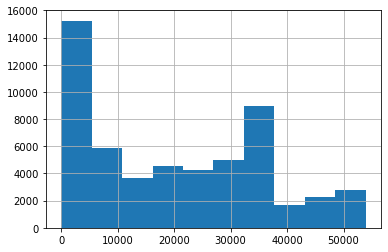

In [95]:
df_train_x_labeled["max_lifetime_cancel"].hist()

<AxesSubplot:>

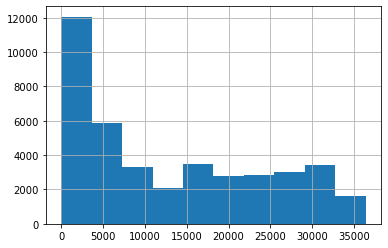

In [96]:
common = df_train_x_labeled.describe()["max_lifetime_cancel"]["mean"] + df_train_x_labeled.describe()["max_lifetime_cancel"]["std"]
df_train_x_labeled[df_train_x_labeled["max_lifetime_cancel"] <= common]["max_lifetime_cancel"].hist()

<AxesSubplot:>

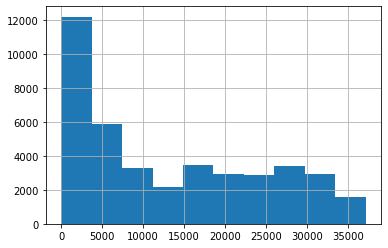

In [97]:
q75 =df_train_x_labeled.describe()["max_lifetime_cancel"]["75%"]
df_train_x_labeled[df_train_x_labeled["max_lifetime_cancel"] <= q75]["max_lifetime_cancel"].hist()

In [98]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["max_lifetime_cancel"] == 0.0]) + df_train_x_labeled["max_lifetime_cancel"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["max_lifetime_cancel"])) * 100

0.0

<h3>MaxNbTradesBySecond</h3>

<AxesSubplot:>

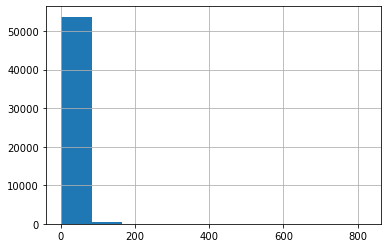

In [99]:
df_train_x_labeled["MaxNbTradesBySecond"].hist()

<AxesSubplot:>

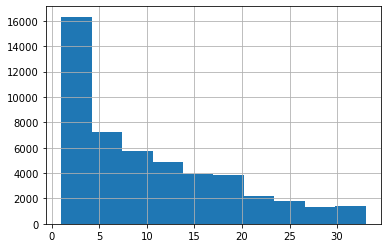

In [100]:
common = df_train_x_labeled.describe()["MaxNbTradesBySecond"]["mean"] + df_train_x_labeled.describe()["MaxNbTradesBySecond"]["std"]
df_train_x_labeled[df_train_x_labeled["MaxNbTradesBySecond"] <= common]["MaxNbTradesBySecond"].hist()

<AxesSubplot:>

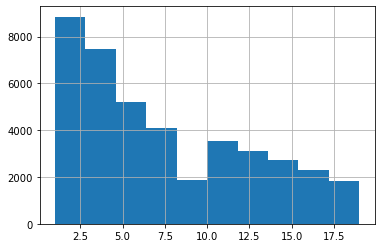

In [101]:
q75 =df_train_x_labeled.describe()["MaxNbTradesBySecond"]["75%"]
df_train_x_labeled[df_train_x_labeled["MaxNbTradesBySecond"] <= q75]["MaxNbTradesBySecond"].hist()

In [102]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["MaxNbTradesBySecond"] == 0.0]) + df_train_x_labeled["MaxNbTradesBySecond"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["MaxNbTradesBySecond"])) * 100

0.0

<h3>MeanNbTradesBySecond</h3>

<AxesSubplot:>

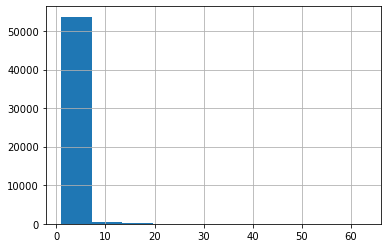

In [103]:
df_train_x_labeled["MeanNbTradesBySecond"].hist()

<AxesSubplot:>

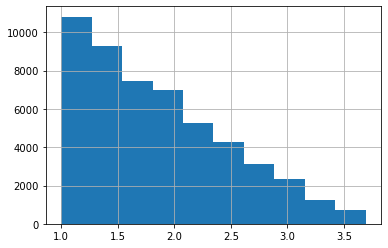

In [104]:
common = df_train_x_labeled.describe()["MeanNbTradesBySecond"]["mean"] + df_train_x_labeled.describe()["MeanNbTradesBySecond"]["std"]
df_train_x_labeled[df_train_x_labeled["MeanNbTradesBySecond"] <= common]["MeanNbTradesBySecond"].hist()

<AxesSubplot:>

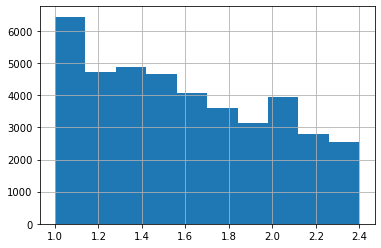

In [105]:
q75 =df_train_x_labeled.describe()["MeanNbTradesBySecond"]["75%"]
df_train_x_labeled[df_train_x_labeled["MeanNbTradesBySecond"] <= q75]["MeanNbTradesBySecond"].hist()

In [106]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["MeanNbTradesBySecond"] == 0.0]) + df_train_x_labeled["MeanNbTradesBySecond"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["MeanNbTradesBySecond"])) * 100

0.0

<h3>min_dt_TV1</h3>

<AxesSubplot:>

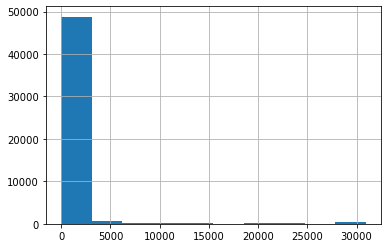

In [107]:
df_train_x_labeled["min_dt_TV1"].hist()

<AxesSubplot:>

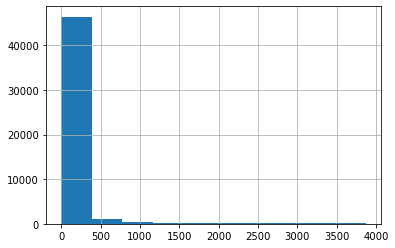

In [108]:
common = df_train_x_labeled.describe()["min_dt_TV1"]["mean"] + df_train_x_labeled.describe()["min_dt_TV1"]["std"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1"] <= common]["min_dt_TV1"].hist()

<AxesSubplot:>

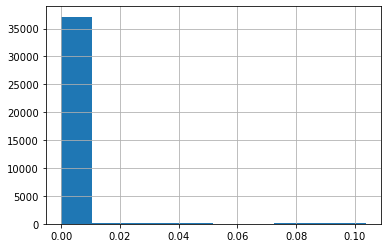

In [109]:
q75 =df_train_x_labeled.describe()["min_dt_TV1"]["75%"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1"] <= q75]["min_dt_TV1"].hist()

In [110]:
#% of missing values or 0
zeros_or_empty = len(df_train_x_labeled[df_train_x_labeled["min_dt_TV1"] == 0.0]) + df_train_x_labeled["min_dt_TV1"].isna().sum()
(zeros_or_empty / len(df_train_x_labeled["min_dt_TV1"])) * 100

6.83990497062561

<h3>min_dt_TV1_TV2</h3>

<AxesSubplot:>

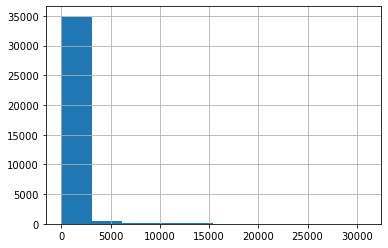

In [111]:
df_train_x_labeled["min_dt_TV1_TV2"].hist()

<AxesSubplot:>

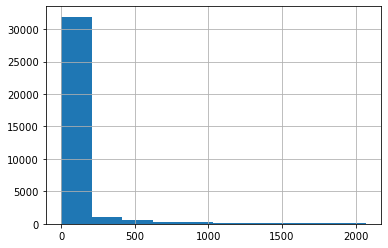

In [112]:
common = df_train_x_labeled.describe()["min_dt_TV1_TV2"]["mean"] + df_train_x_labeled.describe()["min_dt_TV1_TV2"]["std"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV2"] <= common]["min_dt_TV1_TV2"].hist()

<AxesSubplot:>

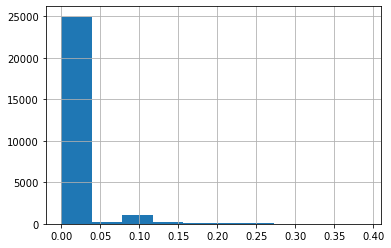

In [113]:
q75 =df_train_x_labeled.describe()["min_dt_TV1_TV2"]["75%"]
df_train_x_labeled[df_train_x_labeled["min_dt_TV1_TV2"] <= q75]["min_dt_TV1_TV2"].hist()

In [15]:
#target
df_train_x_labeled.corr()["is_hft"]

OTR                           0.187449
OCR                          -0.124485
OMR                           0.143588
min_time_two_events          -0.077665
mean_time_two_events         -0.362439
10_p_time_two_events         -0.087334
med_time_two_events          -0.138230
25_p_time_two_events         -0.122980
75_p_time_two_events         -0.220449
90_p_time_two_events         -0.394790
max_time_two_events          -0.495152
min_lifetime_cancel          -0.331280
mean_lifetime_cancel         -0.473314
10_p_lifetime_cancel         -0.320926
med_lifetime_cancel          -0.337156
25_p_lifetime_cancel         -0.312540
75_p_lifetime_cancel         -0.426560
90_p_lifetime_cancel         -0.479335
max_lifetime_cancel          -0.405476
NbTradeVenueMic               0.661494
MaxNbTradesBySecond           0.195261
MeanNbTradesBySecond          0.150060
min_dt_TV1                   -0.022134
mean_dt_TV1                  -0.150744
med_dt_TV1                   -0.081413
min_dt_TV1_TV2           

In [16]:
#correlated features hold similar information to the learning algorithm and should be removed
correlated_features = set()
correlation_matrix = df_train_x_labeled.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [17]:
correlated_features

{'10_p_lifetime_cancel',
 '10_p_time_two_events',
 '25_p_lifetime_cancel',
 '75_p_lifetime_cancel',
 '75_p_time_two_events',
 '90_p_lifetime_cancel',
 '90_p_time_two_events',
 'max_lifetime_cancel',
 'mean_dt_TV1',
 'mean_dt_TV1_TV2',
 'mean_dt_TV1_TV3',
 'mean_dt_TV1_TV4',
 'med_dt_TV1',
 'med_dt_TV1_TV2',
 'med_dt_TV1_TV3',
 'med_dt_TV1_TV4',
 'med_lifetime_cancel',
 'min_dt_TV1_TV3',
 'min_dt_TV1_TV4'}

In [18]:
df_uncorralated = df_train_x_labeled.drop(columns=correlated_features, axis=1)

<h2>Binary Features</h2>

In [19]:
df_uncorralated.head(5)

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,med_time_two_events,25_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,min_dt_TV1_TV2,NbSecondWithAtLeatOneTrade,is_hft
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,419.688500,10.722543,25139.598,682.153260,8272.770569,1,7,2.750000,351.702399,NaN,4,0
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.003374,0.000204,31278.357,11.866026,3796.632686,1,17,5.933333,0.000066,NaN,15,0
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000599,0.000129,30799.467,2.761036,1397.103679,1,20,5.063492,0.000018,NaN,63,0
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,6.152666,0.000945,19187.719,286.019320,9736.869034,1,8,4.250000,0.000148,NaN,4,0
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.001364,0.000146,23164.514,2.798452,10066.803992,1,19,3.710526,0.000025,NaN,38,0


In [20]:
def fn_binary(row,index_name,boundary):
    if row[index_name] <= boundary:
        return 1
    else:
        return 0
    
def fn_has_value(row,index_name):
    if row[index_name] > 0:
        return 1
    else:
        return 0

In [21]:
dic_boundaries = {
    "OTR":10,
    "OCR":10,
    "OMR":5,
    "min_time_two_events":0.25,
    "mean_time_two_events":500,
    #"10_p_time_two_events":0.00025,
    "med_time_two_events":17,
    "25_p_time_two_events":0.2,
    #"75_p_time_two_events":500,
    #"90_p_time_two_events":2500,
    #"mean_dt_TV1_TV2":100,
    #"med_dt_TV1_TV2":10,
    #"min_dt_TV1_TV3":0.1,
    #"mean_dt_TV1_TV3":50,
    #"med_dt_TV1_TV3":19,
    #"min_dt_TV1_TV4":0.24,
    #"mean_dt_TV1_TV4":50,
    #"med_dt_TV1_TV4":23,
    "NbSecondWithAtLeatOneTrade":45,
    "NbTradeVenueMic":8,
    #"max_lifetime_cancel":35000,
    "MaxNbTradesBySecond":17.5,
    "MeanNbTradesBySecond":2.4,
    "min_dt_TV1":0.015,
    "min_dt_TV1_TV2":0.1
}

#for values !=0 or NaN where significant
dic_has_value  ={
    "OMR":True,
    "min_time_two_events":True,
    #"10_p_time_two_events":True,
    "25_p_time_two_events":True,
    #"mean_dt_TV1_TV2":True,
    #"med_dt_TV1_TV2":True,
    #"min_dt_TV1_TV3":True,
    #"mean_dt_TV1_TV3":True,
    #"med_dt_TV1_TV3":True,
    #"min_dt_TV1_TV4":True
    #"mean_dt_TV1_TV4":True,
    #"med_dt_TV1_TV4":True    
}

In [22]:
df_binarised = df_uncorralated.copy()
for key,val in dic_boundaries.items():
    df_binarised[key] = df_uncorralated.apply(lambda row:fn_binary(row,key,val), axis=1)
    if key in dic_has_value:
        df_binarised[key + '_has_value'] = df_uncorralated.apply(lambda row:fn_has_value(row,key), axis=1)
    
df_binarised = df_binarised.drop(columns=['Share','Day','Trader','max_time_two_events','min_lifetime_cancel','mean_lifetime_cancel'])

In [23]:
df_binarised.head(5)

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,med_time_two_events,25_p_time_two_events,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,min_dt_TV1_TV2,NbSecondWithAtLeatOneTrade,is_hft,OMR_has_value,min_time_two_events_has_value,25_p_time_two_events_has_value
0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
1,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1
2,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1
4,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1


In [24]:
Y = df_binarised["is_hft"]
X = df_binarised.drop(columns=['is_hft'],axis=1)

In [25]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    shuffle=True)

In [27]:
depth = 15
clf = tree.DecisionTreeClassifier(max_depth=depth,criterion="entropy", random_state=0)
clf = clf.fit(X_train, Y_train)
Y_pred_train = clf.predict(X_train)
precision_train = accuracy_score(Y_train, Y_pred_train)*100
print("Train precision set: {:4.2f}%".format(precision_train))

Y_pred_test = clf.predict(X_test)
precision_test = accuracy_score(Y_test, Y_pred_test)*100
print("Test precision set: {:4.2f}%".format(precision_test),'\n')

Train precision set: 95.66%
Test precision set: 94.97% 



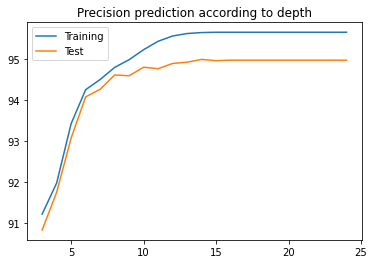

In [28]:
#different depth
clf = {}
Y_pred_train = {}
Y_pred_test = {}
precision_train={}
precision_test = {}

for p in range(3,25):
    clf[p] = tree.DecisionTreeClassifier(max_depth = p,
                                   criterion = "entropy", 
                                   random_state = 0).fit(X_train, Y_train)
        
    Y_pred_train[p] = clf[p].predict(X_train)
    precision_train[p] = accuracy_score(Y_train, Y_pred_train[p])*100
    
    Y_pred_test[p] = clf[p].predict(X_test)
    precision_test[p] = accuracy_score(Y_test, Y_pred_test[p])*100

precision = pd.DataFrame( {'Training':precision_train,
                           'Test': precision_test})

precision.plot.line(
    title ='Precision prediction according to depth')
plt.show()    

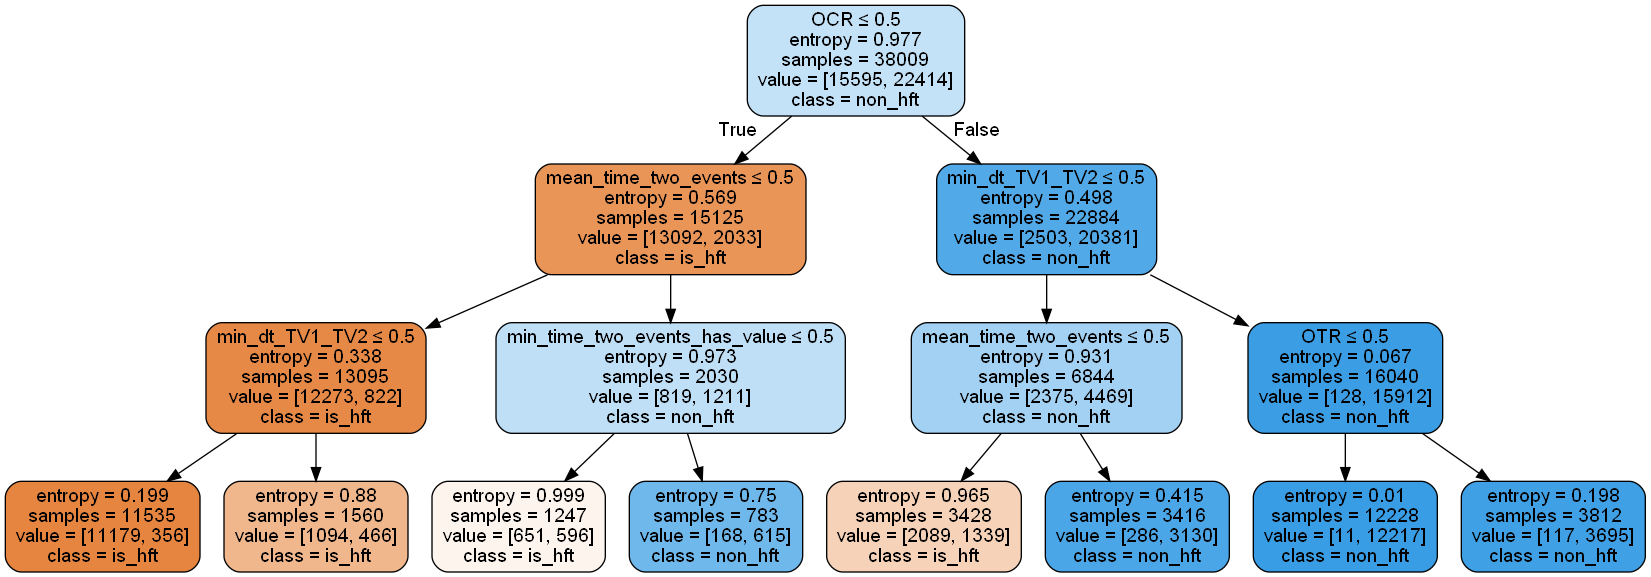

In [29]:
import graphviz
from IPython.display import Image
from pydotplus import graph_from_dot_data

dot_data = tree.export_graphviz(clf[3], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X.columns,
                           max_depth = 3,
                           class_names = ['is_hft','non_hft'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

In [29]:
clf[3].feature_importances_.sum()

0.9999999999999999

<AxesSubplot:>

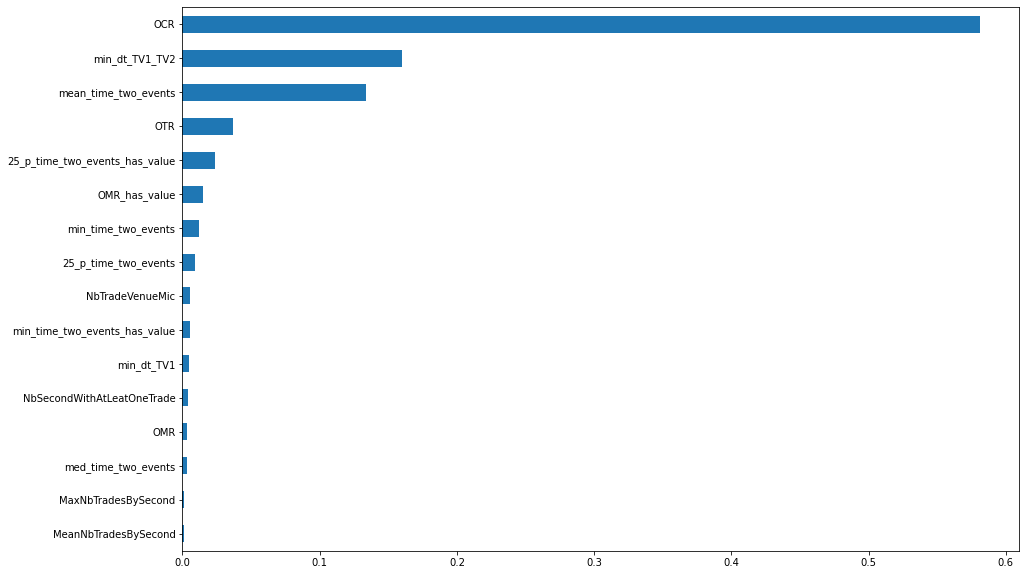

In [30]:
weights = pd.Series(clf[6].feature_importances_,
                    index=X.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

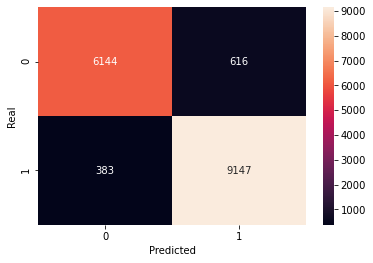

In [31]:
import seaborn as sns

data = {'Y_Real':  Y_test,
        'Y_Prediccion': Y_pred_test[6]
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

<h2>ROC Curve</h2>

In [32]:
clf[3].predict(X_test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
print(clf[3].predict_proba(X_test))

[[2.80957336e-02 9.71904266e-01]
 [9.69028463e-01 3.09715373e-02]
 [8.83392226e-02 9.11660777e-01]
 ...
 [2.80957336e-02 9.71904266e-01]
 [7.38431244e-04 9.99261569e-01]
 [7.38431244e-04 9.99261569e-01]]


In [35]:
import numpy as np
threshold = 0.4
prediccion_test = np.where( clf[3].predict_proba(X_test)[:, 1] > threshold, 1, 0)
prediccion_test

array([1, 0, 1, ..., 1, 1, 1])

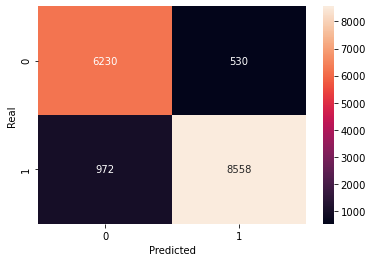

In [36]:
data = {'Y_Real':  Y_test,
        'Y_Prediccion': prediccion_test
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [49]:
def roc_chart(clf, y_test):    
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #AUC Area Under the Curve
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("High Frequency Trader")
    plt.legend(loc="lower right")
    plt.show()

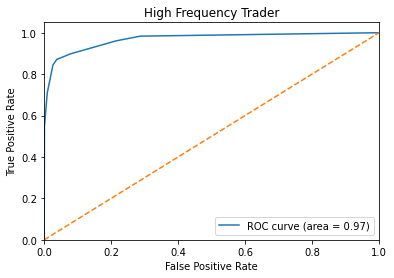

In [50]:
roc_chart(clf[3], Y_test)

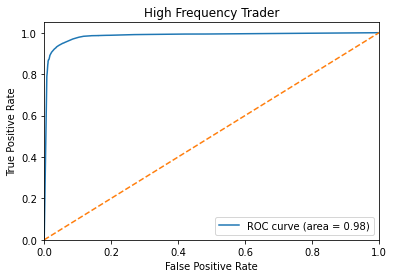

In [51]:
roc_chart(clf[20], Y_test)